# About

A script to generate all figures pertaining to the persistent entrainment subsection in section 2 of the thesis. To obtain data files, export them from 'sec2_entrainment.mat'.

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import special
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files from Matlab
import_folder = 'sec2_entrainment' # 'sec3_dirac_numerics2'
import_file = 'trial1.mat'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'matlab', 'data', import_folder, import_file)

# Import and compile data

In [3]:
dict_im = sio.loadmat(dir_im)

# Parameters
g = dict_im['g'][0,0]
omega0 = dict_im['omega0'][0,0]
D = dict_im['D'][0,0]
tau = dict_im['tau'][0,0]
omega = np.reshape(dict_im['omega'],-1)
S = np.reshape(dict_im['S'],-1)
u0 = dict_im['u0'][0,0]
R = dict_im['R'][0,0]

t0 = dict_im['t0'][0,0]
t1 = dict_im['t1'][0,0]
t2 = dict_im['t2'][0,0]
tf = dict_im['tf'][0,0]

# Solutions
sol = {'t': np.reshape(dict_im['t'],-1),
       'y': np.reshape(dict_im['y'],-1),
       'yp': np.reshape(dict_im['yp'],-1)
      }

Sfun = {'t': np.reshape(dict_im['Sarr_x'],-1),
        'y': np.reshape(dict_im['Sarr_y'],-1)}

freqPre = np.reshape(dict_im['freqPre'],-1)
powPre = np.reshape(dict_im['powPre'],-1)
freqEnt = np.reshape(dict_im['freqEnt'],-1)
powEnt = np.reshape(dict_im['powEnt'],-1)
freqPost = np.reshape(dict_im['freqPost'],-1)
powPost = np.reshape(dict_im['powPost'],-1)

# Eigenvalues
eigs1 = dict_im['eigs1']
eigs2 = dict_im['eigs2']

# Analytic curve
omega_max = np.max(np.abs(eigs1.imag))
omega_arr = np.linspace(-omega_max, omega_max, num=1000)
C_arr = -0.5*np.log((1+omega_arr**2)/R**2)

# Figure

Solution and power spectrum plots

## Options

In [4]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.05, 0.75, 0.90, 0.20] # Top (solution)
bbox1 = [0.05, 0.05, 0.40, 0.55] # Left (eigenvalues)
bbox2 = [0.55, 0.05, 0.40, 0.55] # Right (power spectrum)

# Colours
col1 = 'black'
colpow1 = 'orange'
colpow2 = 'magenta'
colpow3 = 'blue'

# Alphas
alpha1 = 0.95
alpha2 = 0.25
alpha3 = 0.8

# Linewidths
lw1 = 0.8
lw2 = 0.8
lw3 = 1.6
lw4 = 1.2

# Linestyle
ls1 = 'dashed'

pfun = lambda x: np.log(x)

## Generate figure

(0, 40)

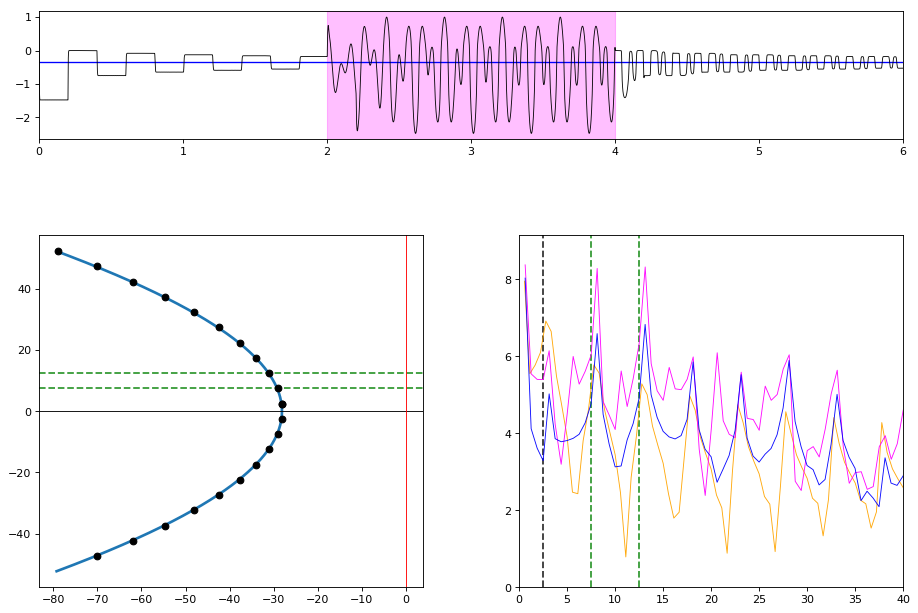

In [5]:
fig, ax = plt.subplots(3, figsize=(12,8), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)

# Plot
ax[0].plot(sol['t']/1000, sol['y'], color=col1, alpha=alpha1, linewidth=lw1, zorder=2)
ax[0].axvspan(t1/1000, t2/1000, alpha=alpha2, color=colpow2, zorder=0)
ax[0].axhline(y=u0, color='blue', linewidth=lw4, zorder=0)

ax[1].scatter(1000*eigs1.real*tau, 1000*eigs1.imag/(2*pi), color='black', zorder=2)
ax[1].scatter(1000*eigs2.real*tau, 1000*eigs2.imag/(2*pi), color='black', zorder=2)
ax[1].axhline(y=1000*omega[0]/(2*pi), color='green', alpha=alpha3, linewidth=lw3, ls=ls1, zorder=0)
ax[1].axhline(y=1000*omega[1]/(2*pi), color='green', alpha=alpha3, linewidth=lw3, ls=ls1, zorder=0)

ax[1].plot(1000*C_arr, 1000*omega_arr/(2*pi), linewidth=2.4, zorder=0)

ax[2].plot(1000*freqPre, pfun(powPre), color=colpow1, alpha=alpha1, linewidth=lw2, zorder=2)
ax[2].plot(1000*freqEnt, pfun(powEnt), color=colpow2, alpha=alpha1, linewidth=lw2, zorder=2)
ax[2].plot(1000*freqPost, pfun(powPost), color=colpow3, alpha=alpha1, linewidth=lw2, zorder=2)

ax[2].axvline(x=1000*omega[0]/(2*pi), color='green', alpha=alpha3, linewidth=lw3, ls=ls1, zorder=0)
ax[2].axvline(x=1000*omega[1]/(2*pi), color='green', alpha=alpha3, linewidth=lw3, ls=ls1, zorder=0)
ax[2].axvline(x=1000/tau/2, color='black', alpha=alpha3, linewidth=lw3, ls=ls1, zorder=0)

# Modify axes
ax[0].set_xlim(left=np.min(sol['t']/1000), right=np.max(sol['t']/1000))
ax[1].axhline(y=0, color='black', linewidth=0.8, zorder=0)
ax[1].axvline(x=0, color='red', linewidth=0.8, zorder=0)    
ax[2].set_ylim(bottom=0)
ax[2].set_xlim(left=0, right=40)

## Statistics

In [6]:
# Frequency is in Hz, not rad/s!
print(f'g = {g} \nD = {D} \ntau = {tau}')

g = -1.5 
D = 0.22 
tau = 200
